***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* 8. Calibration 
    * Previous: [8.2 1GC calibration: point source, derive bandpass gains]()
    * Next: [8.4 3GC calibration: direction dependent self-calibration]()

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import section specific modules:

In [2]:
from IPython.display import Image

## 8.3 2GC Calibration: direction independent self-calibration

After performing 1GC (applying the antenna gains from the calibrator to the target field)
we should be able to make a decent image of our target-field. The dynamic range of this image can be improved even further when we use the *self-calibration* framework.

### 8.3.1 Self-Calibration

In self-calibration we use the field that we are observing to also calibrate the observation. In Fig. [INREF](#cal:fig:self_cal) <!--\ref{cal:fig:self_cal}--> we have a block diagram depicting the self-calibration framework. We continiously switch between two domains during self-calibration, namely the image and visibility domain. In the image domain we perform deconvolution and source finding, while calibration takes place in the visibility domain. Deconvolution and source finding are discussed in Sec. and Sec. respectively. It is important to realize that Fig. [INREF](#cal:fig:self_cal) should be regardes as a very rudimentary representation of the self-calibration framework as many deconvolution algorithms also switch continuously between the image and visibility domain. Self-calibration is perfomed by using the following procedure:

1. We start by creating (from the 1GC image) a very simplistic initial sky-model of our target field.
2. We use the initial/improved sky-model to calibrate our observed visibilities which we then subsequently image.
3. We deconvolve the resulting image. 
4. We run a source finder on the deconvolved image to construct a more accurate sky-model. 
5. We go back to step 2. The algorithm terminates when we reach a desired dynamic range or if convergence is reached.

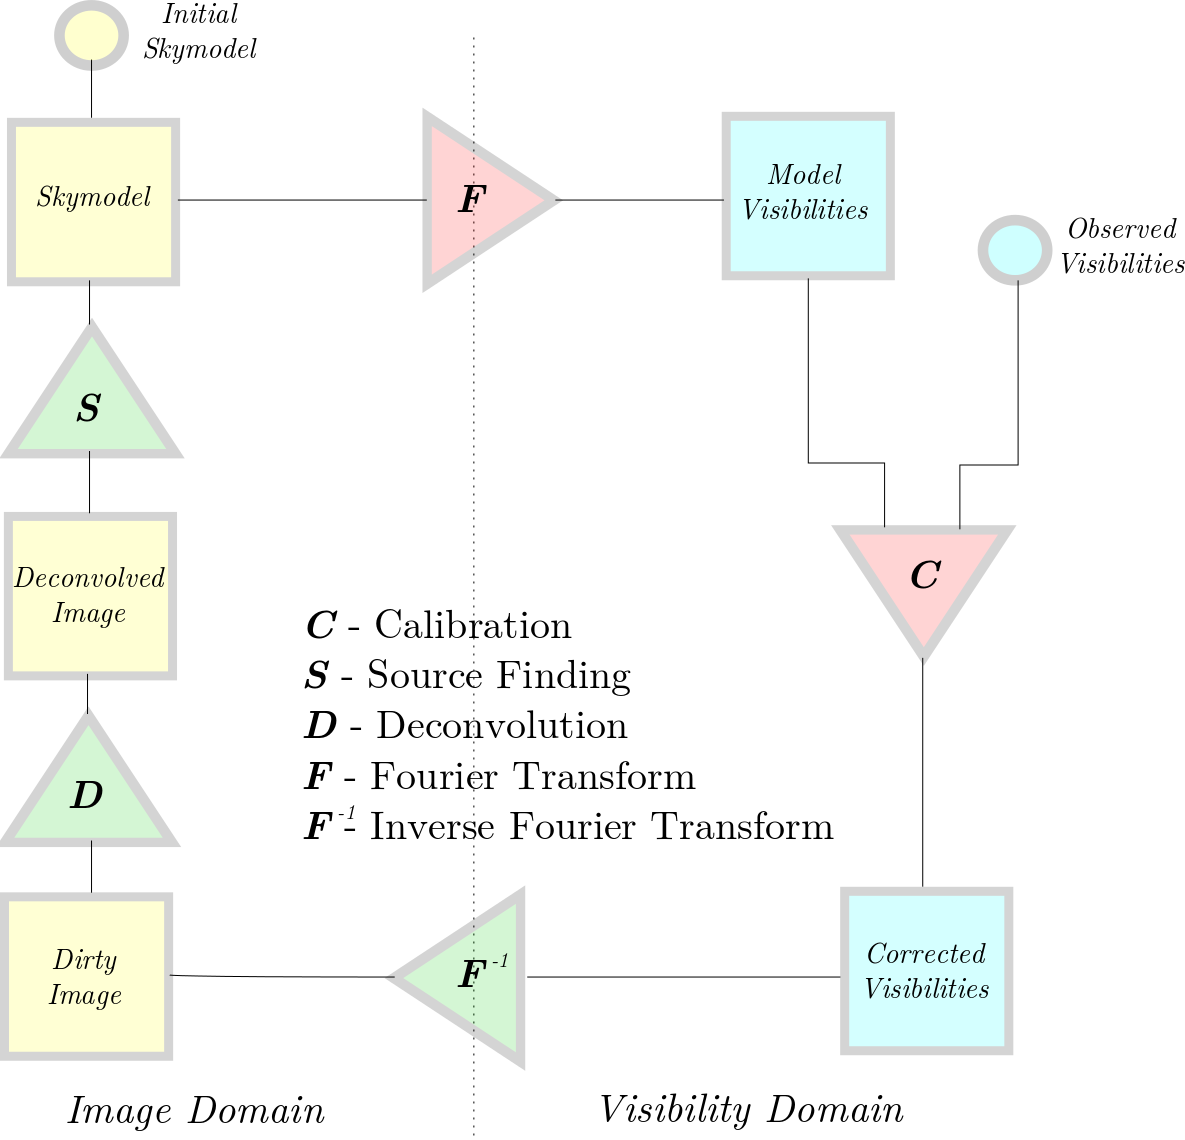

In [3]:
Image(filename='figures/Selfcal2.png', width=600, height=100)

*Caption: The self-calibration framework.*<a id='cal:fig:self_cal'></a> <!--\label{cal:fig:self_cal}-->

### 8.3.2 Hybrid-mapping

Up until this point I did not describe the actual calibration algorithm one needs to use in
the self-calibration framework. The reason being, there are a wide range of calibration algorithms that could in principle be employed. Currently, the standard calibration approach that is used is the least-squares approach discussed in Sec. [EXREF](../8_Calibration/8_1_Calibration_Least_Squares_Problem.ipynb#cal:sec:cal_ls) <!--\ref{cal:sec:cal_ls}-->. This was not always the case. In the past self-calibration actually employed closure quantities (see <cite data-cite='Jennison1958'>A phase sensitive interferometer technique for the measurement of the Fourier transforms of spatial brightness distributions of small angular extent</cite> [CITE](http://mnras.oxfordjournals.org/content/118/3/276.short) and <cite data-cite='Smith1952'>The measurement of the angular diameter of radio stars</cite> [CITE](http://iopscience.iop.org/article/10.1088/0370-1301/65/12/309/meta;jsessionid=9DF36DAB88B75643A607FA921E11CC4A.c2.iopscience.cld.iop.org)). We discussed closure quantities in Sec ??. Moreover, the term "self-calibration" itself was also not always in use either. When the calibration algorithm that is used within the self-calibration framework requires closure quantities then we usually refer to self-calibration as *hybrid-mapping*. One of the best known hybrid-mapping approaches were developed by Readhead and Wilkonson (<cite data-cite='Readhead1978'>The mapping of compact radio sources from VLBI data</cite> [CITE](http://adsabs.harvard.edu/full/1978ApJ...223...25R)). It requires the following steps:

1. If we have an $N$-element array, we obtain $N-1$ baseline phases from an initial sky-model. 
2. The reamining baseline-phases are all chosen such that they satisfy the measeured closure-phases. 
3. After imaging the corrected visibilities, deconvolution is performed. We are now able to improve the sky-model. 
4. Go to step 2, if we have not converged. 

The idea of rather using a least-squares solver to calibrate was first proposed in <cite data-cite='Schwab1980'>Adaptive calibration of radio interferometer data</cite> [CITE](http://proceedings.spiedigitallibrary.org/proceeding.aspx?articleid=1229965) and <cite data-cite='Cornwill1981'>A new method for making maps with unstable radio interferometers</cite> [CITE](http://mnras.oxfordjournals.org/content/196/4/1067.short). Another interesting concomitant of the least-squares approach is that it allows us to solve for individual antenna gains, instead of baseline-based gains. Good literatrue reviews on self-calibration can be found in <cite data-cite='Ekers1984'>The almost serendipitous discovery of self-calibration</cite> [CITE](http://adsabs.harvard.edu/abs/1984sdra.conf..154E) and <cite data-cite='Pearson1984'>Image formation by self-calibration in radio astronomy</cite> [CITE](http://adsabs.harvard.edu/full/1984ARA%26A..22...97P).

***

Next: [8.4 3GC calibration: direction dependent self-calibration]()